Bonus for Assignment 5 - Khashayar Vani

 *** Demo for Pix2Struct Model ***

I chose AI Image inpainting, because I found it that is related to Pix2Struct

1. Pre Install

In [1]:
pip install transformers datasets accelerate pillow diffusers


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 11.4 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


2. Load the Image

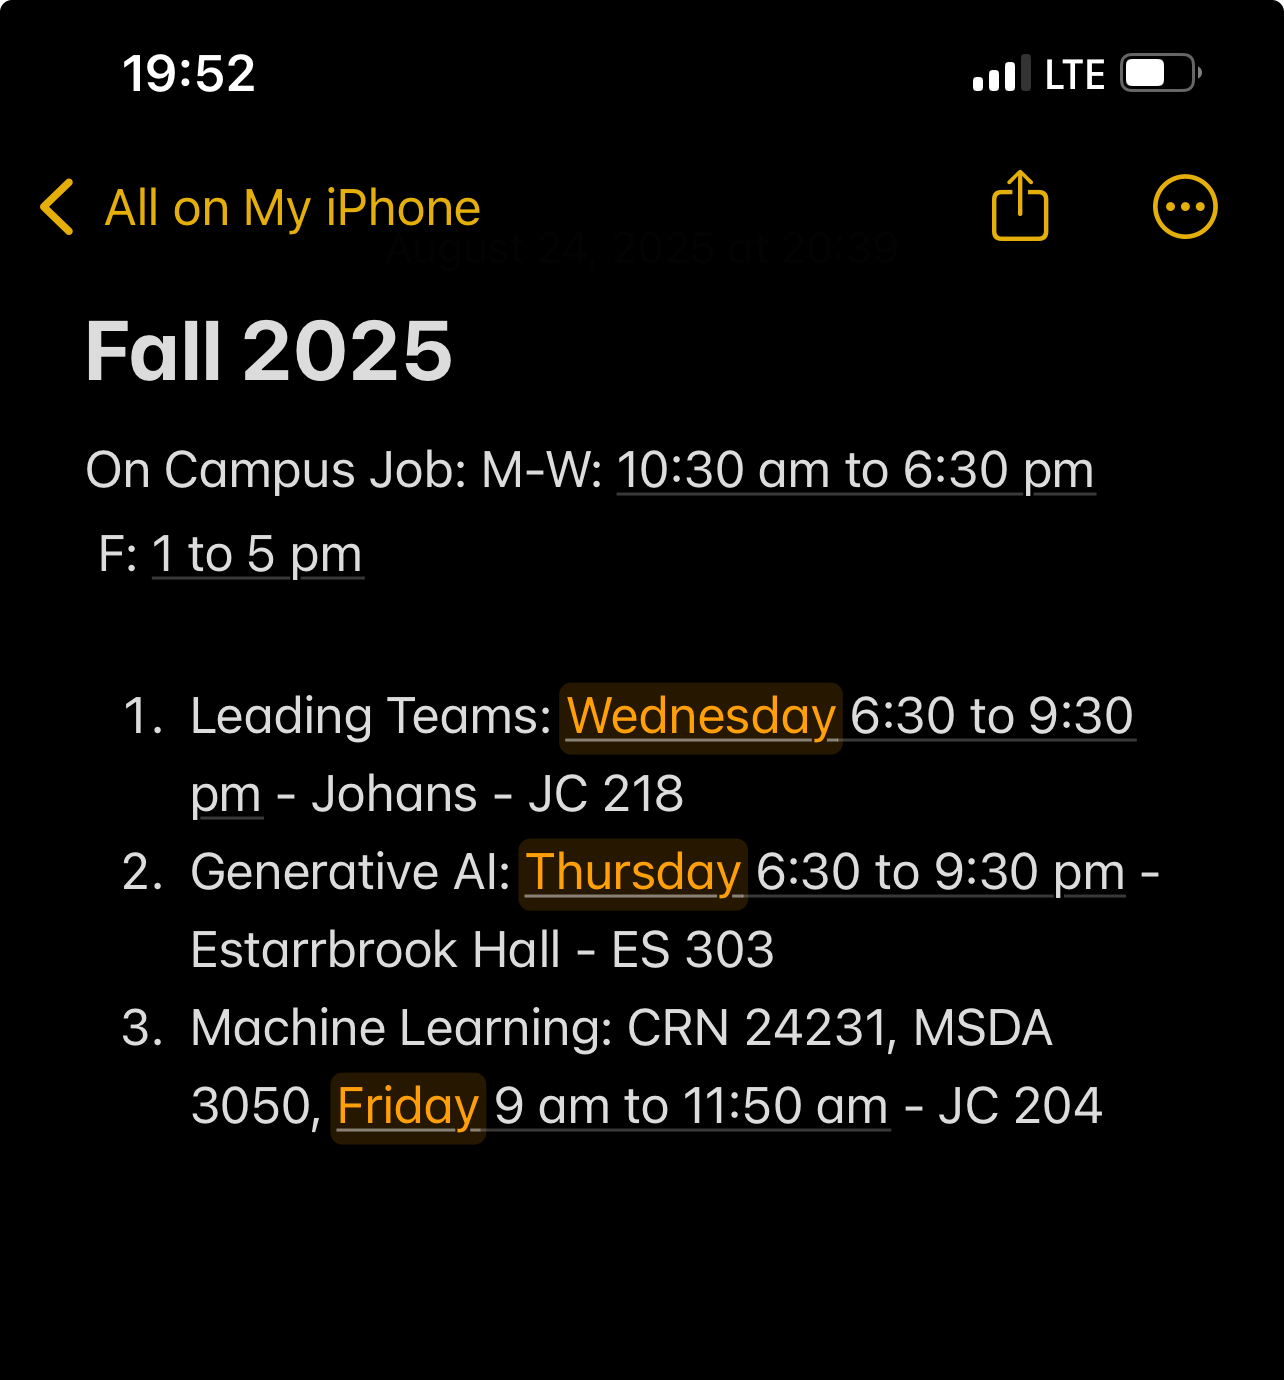

In [2]:
from PIL import Image

# Load your local image
image_path = "/Users/khasha/Pictures/IMG_1174.jpg"
image = Image.open(image_path).convert("RGB")
image


3. Run Lightweight Inpainting

In [8]:
from diffusers import StableDiffusionInpaintPipeline
import torch

# Load pipeline (low GPU usage, works on CPU/M1 with torch.mps)
pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "runwayml/stable-diffusion-inpainting",
    torch_dtype=torch.float16
)

# Create a mask (white = area to change, black = keep)
mask = Image.new("RGB", image.size, (0, 0, 0))
# For demo: remove top-left area
for x in range(0, 50):
    for y in range(0, 50):
        mask.putpixel((x, y), (60, 60, 60))

# Run inpainting
result = pipe(prompt="replace with a clean background", image=image, mask_image=mask).images[0]
result.show()


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch /Users/khasha/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /Users/khasha/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /Users/khasha/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /Users/khasha/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


  0%|          | 0/50 [00:00<?, ?it/s]

KeyboardInterrupt: 

***Demo for Qwen3 Embedding

I chose AI Speech Translation.

In [9]:
pip install transformers accelerate datasets sentencepiece librosa soundfile faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 8.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10/10 [librosa]9/10 [librosa]
Note: you may need to restart the kernel to use updated packages.


In [10]:
from transformers import pipeline, AutoTokenizer, AutoModel
import torch
import numpy as np
import faiss

In [15]:
pip  install ffmpeg


  Preparing metadata (setup.py) ... done
  DEPRECATION: Building 'ffmpeg' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'ffmpeg'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6084 sha256=f050fdc7b8b970bbaf914d169d642281d8112f39605a7baba7dcdf0c6fb00f61
  Stored in directory: /Users/khasha/Library/Caches/pip/wheels/a4/04/6c/ab972358c48aedc5be02f1d28968f2baa491a2837270932043
Successfully built ffmpeg
Note: you may need to restart the kernel to use updated packages.


In [24]:
from scipy.io.wavfile import write
import numpy as np

# Parameters
samplerate = 16000  # 16 kHz
duration = 1  # 1 second
frequency = 440  # A4 tone

t = np.linspace(0., duration, int(samplerate * duration))
audio = 0.5 * np.sin(2 * np.pi * frequency * t)

# Save as WAV
write("/Users/khasha/Downloads/sample_voice.wav", samplerate, (audio * 32767).astype(np.int16))
print("Sample WAV file created!")


Sample WAV file created!


In [25]:
import soundfile as sf

audio_file_path = "/Users/khasha/Downloads/sample_voice.wav"
audio, samplerate = sf.read(audio_file_path)

# Pass to your ASR model
result = asr(audio)
print(result)


{'text': ' beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep beep